In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import random
import math
import statistics as st
import numpy as np

In [34]:
plt.rcParams['figure.figsize']=13,8

In [35]:
def flip_coin():
    return random.choice(["H","T"])

In [36]:
def flip_coin_lots(n=2**16):
    intervals = {}
    heads = 0.1
    tails = 0.1
    for i in range(1,n+1):
        flip = flip_coin()
        if flip =="H":
            heads += 1
        elif flip == "T":
            tails += 1
        else:
            raise ValueError("")
        if math.log2(i).is_integer():
            intervals[i] = {'heads':heads,'tails':tails}
    if n not in intervals:
        intervals[n] = {'heads':heads,'tails':tails}
    return intervals
        

In [37]:
def fast_flip_lots(flips_per_sample, number_of_samples):
    temp_data = np.random.choice(['H','T'],(flips_per_sample,number_of_samples))
    heads = np.sum(temp_data == "H",axis =0)
    tails = np.sum(temp_data == "T", axis = 0)
    return {'heads':list(heads),'tails':list(tails)}

In [38]:
data = flip_coin_lots()

In [39]:
x_vals = list(data.keys())
x_vals.sort()

In [40]:
repetition_data = []
for i in range(20):
    repetition_data.append(flip_coin_lots())


In [41]:
hundred_flips = fast_flip_lots(100,100000)
hundred_flips_ratio = [hundred_flips['heads'][x] / hundred_flips['tails'][x] for x in range(100000)]


In [42]:
thousand_flips = fast_flip_lots(1000,100000)
thousand_flips_ratio = [thousand_flips['heads'][x] / thousand_flips['tails'][x] for x in range(100000)]

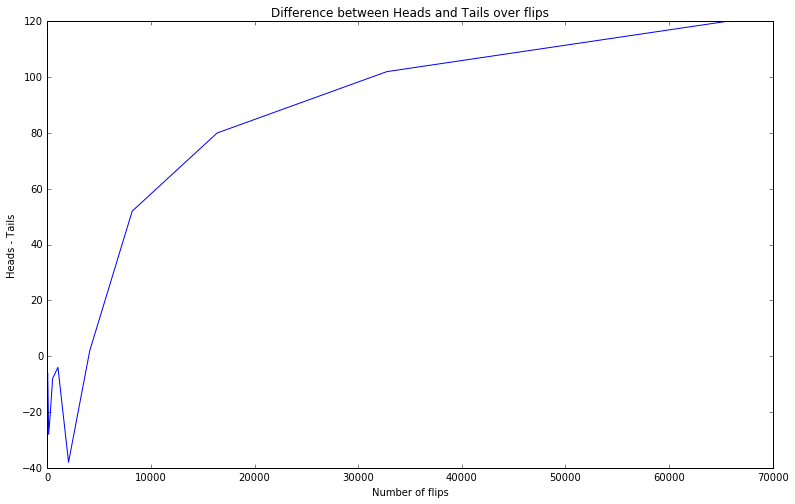

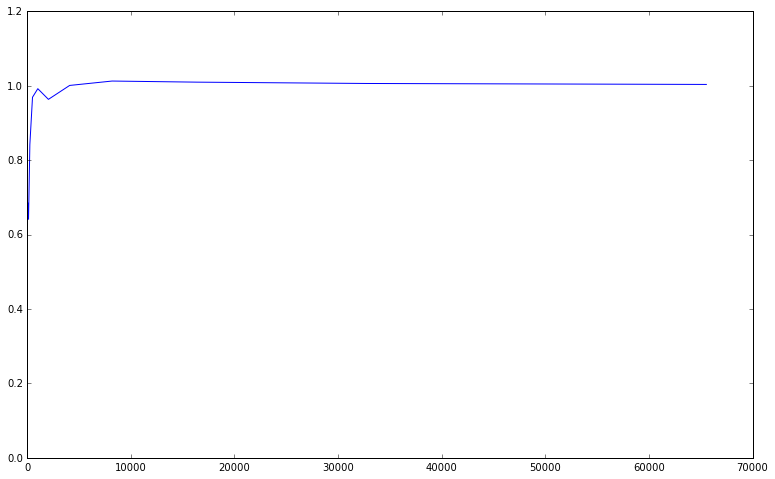

In [67]:
plt.plot(x_vals,[data[x]['heads'] - data[x]['tails'] for x in x_vals])
plt.xlabel('Number of flips')
plt.ylabel('Heads - Tails')
plt.title('Difference between Heads and Tails over flips')
plt.show()
plt.plot(x_vals,[data[x]['heads'] / data[x]['tails'] for x in x_vals])
plt.show()

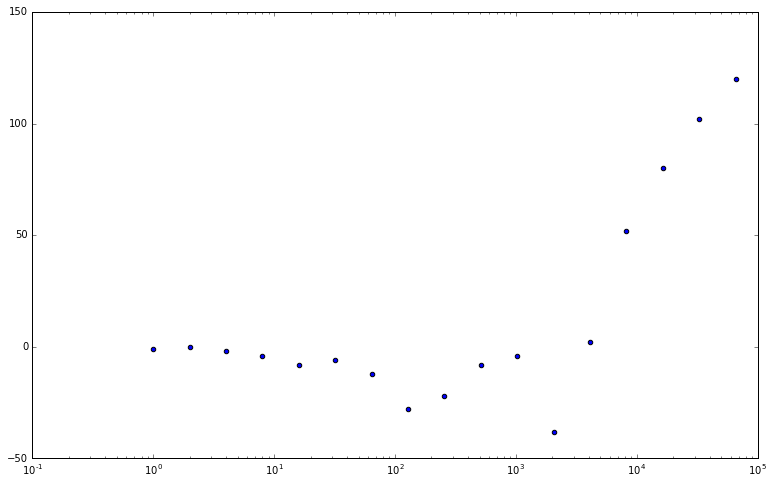

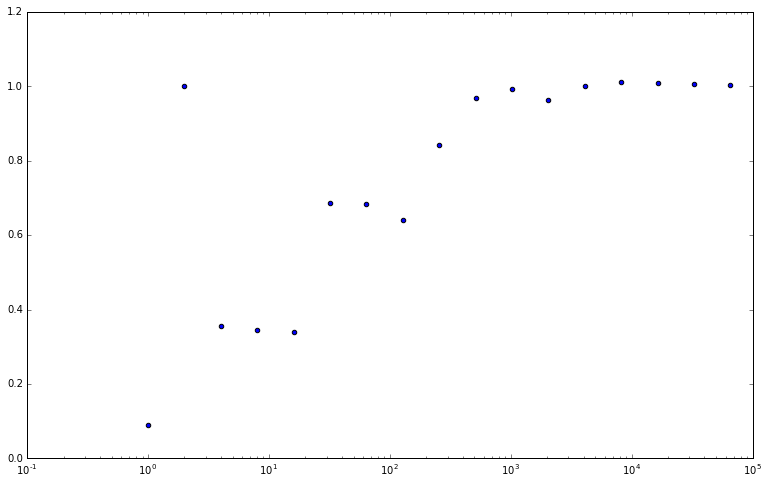

In [44]:
plt.scatter(x_vals,[data[x]['heads'] - data[x]['tails'] for x in x_vals])
plt.xscale('log')
plt.show()
plt.scatter(x_vals,[data[x]['heads'] / data[x]['tails'] for x in x_vals])
plt.xscale('log')
plt.show()

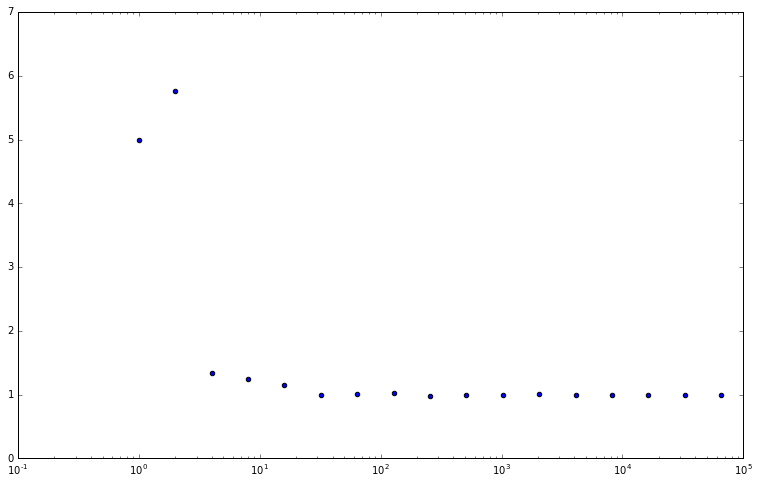

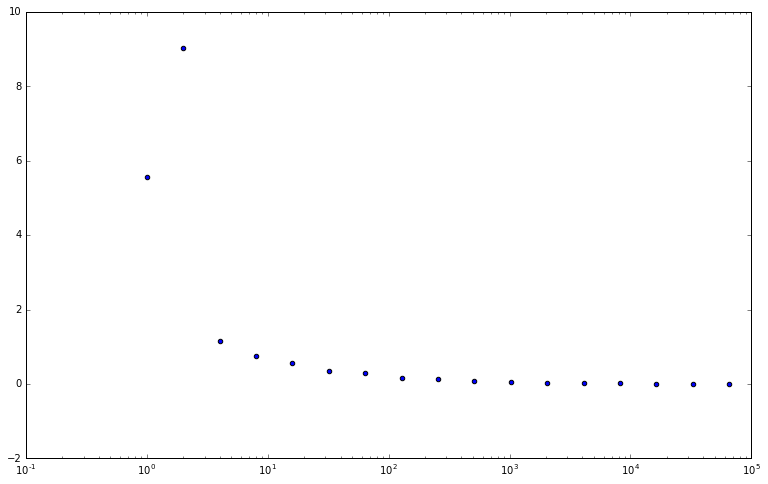

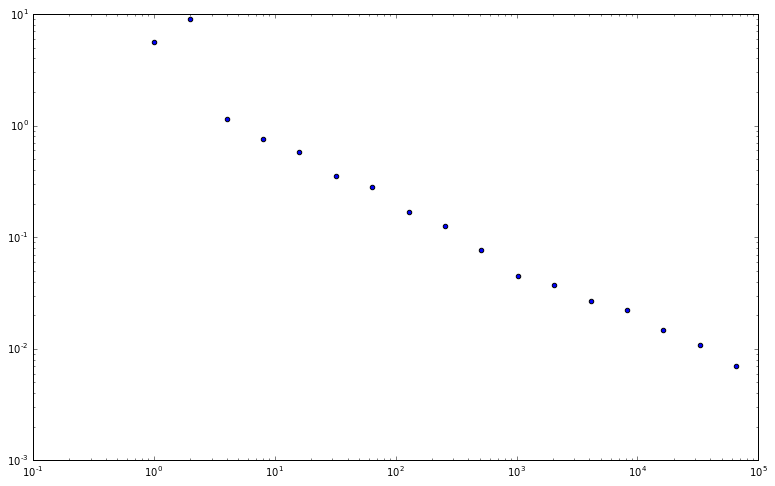

In [45]:

plt.scatter(x_vals,[st.mean([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log')
plt.show()
plt.scatter(x_vals,[st.stdev([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log')
plt.show()
plt.scatter(x_vals,[st.stdev([y[x]['heads']/y[x]['tails'] for y in repetition_data]) for x in x_vals])
plt.xscale('log')
plt.ylim(.001,10)
plt.yscale('log')
plt.show()

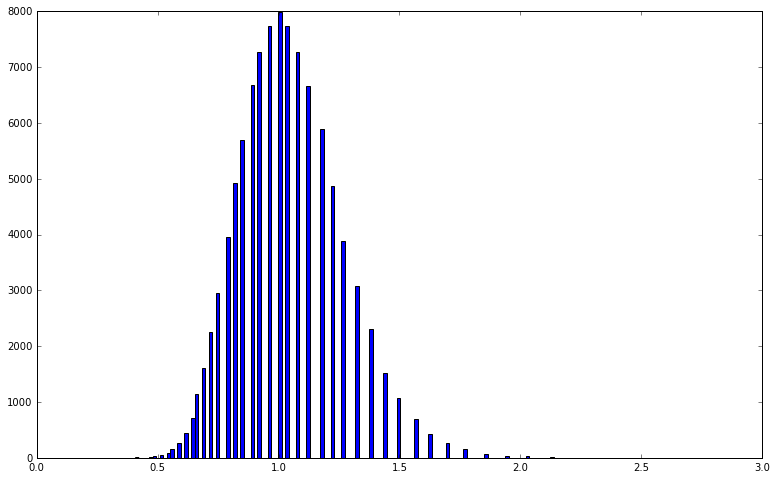

In [65]:
plt.hist(hundred_flips_ratio, bins = 150)
plt.show()

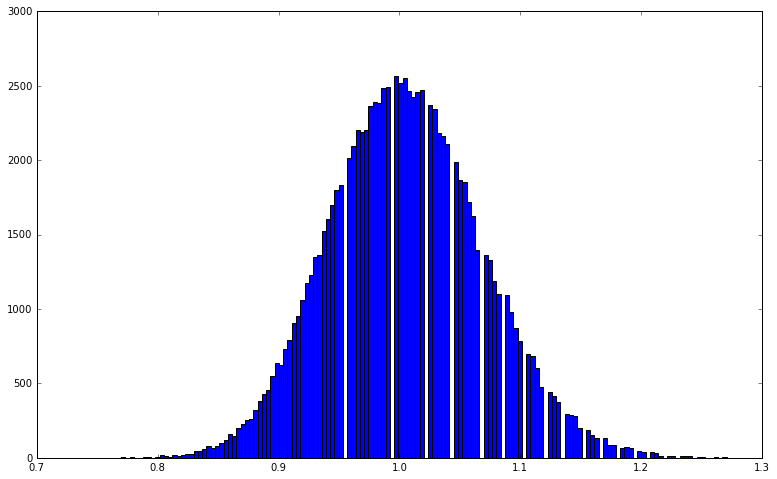

In [64]:
plt.hist(thousand_flips_ratio, bins = 150)
plt.show()

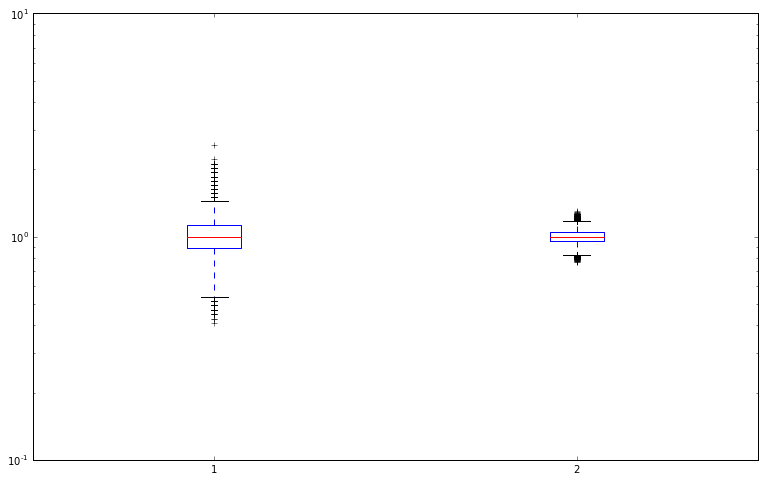

In [48]:
plt.boxplot([hundred_flips_ratio, thousand_flips_ratio])
plt.yscale('log')
plt.show()